<a href="https://www.kaggle.com/code/jakubwalczykowski/churn-for-customer-bank-with-lazypredict-and-rfc?scriptVersionId=123387528" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.model_selection import train_test_split
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-for-customer-bank/Dataset_CBC.xlsx.csv


In [2]:
df = pd.read_csv('/kaggle/input/churn-for-customer-bank/Dataset_CBC.xlsx.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,10134888,1
1,2,15647311,Hill,608,Spain,Female,41,1,8380786,1,0,1,11254258,0
2,3,15619304,Onio,502,France,Female,42,8,1596608,3,1,0,11393157,1
3,4,15701354,Boni,699,France,Female,39,1,0,2,0,0,9382663,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,12551082,1,1,1,790841,0


# Data exploration and visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RowNumber        10000 non-null  int64 
 1   CustomerId       10000 non-null  int64 
 2   Surname          10000 non-null  object
 3   CreditScore      10000 non-null  int64 
 4   Geography        10000 non-null  object
 5   Gender           10000 non-null  object
 6   Age              10000 non-null  int64 
 7   Tenure           10000 non-null  int64 
 8   Balance          10000 non-null  int64 
 9   NumOfProducts    10000 non-null  int64 
 10  HasCrCard        10000 non-null  int64 
 11  IsActiveMember   10000 non-null  int64 
 12  EstimatedSalary  10000 non-null  int64 
 13  Exited           10000 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [4]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [5]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [6]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [7]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [8]:
df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

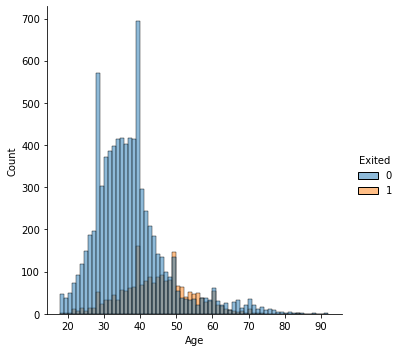

In [9]:
sns.displot(data = df,x = 'Age',hue='Exited')

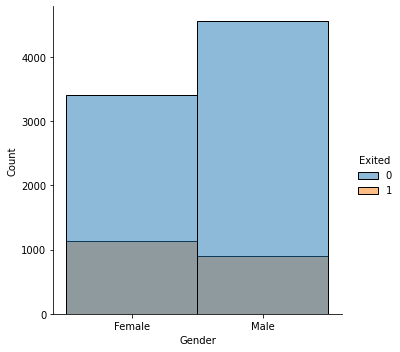

In [10]:
sns.displot(data = df,x = 'Gender',hue='Exited')

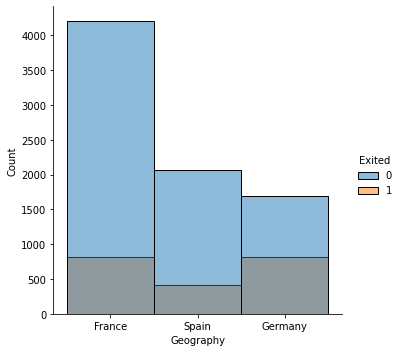

In [11]:
sns.displot(data = df,x = 'Geography',hue='Exited')

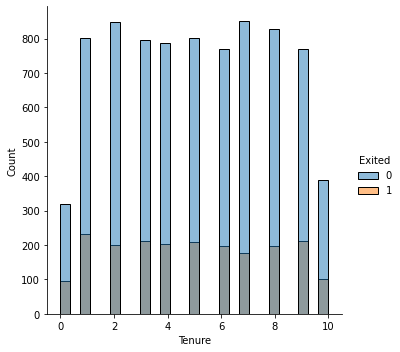

In [12]:
sns.displot(data = df,x = 'Tenure',hue='Exited')

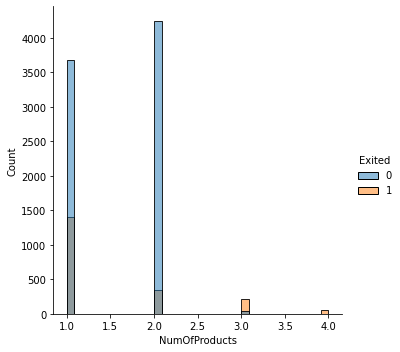

In [13]:
sns.displot(data = df,x = 'NumOfProducts',hue='Exited')

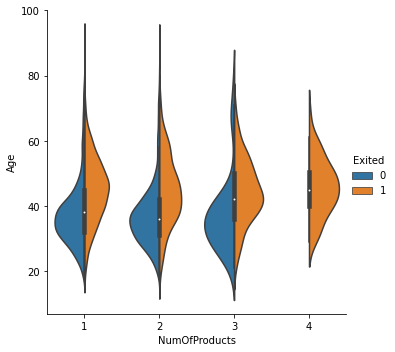

In [14]:
sns.catplot(data=df, kind="violin", x="NumOfProducts", y="Age", hue="Exited", split=True)

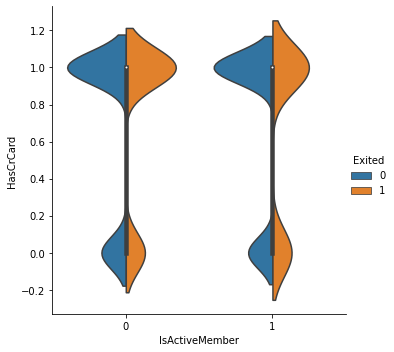

In [15]:
sns.catplot(data=df, kind="violin", x="IsActiveMember", y="HasCrCard", hue="Exited", split=True)


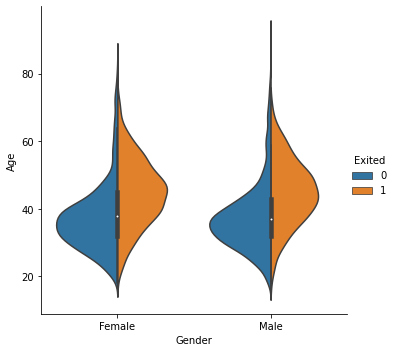

In [16]:
sns.catplot(data=df, kind="violin", x="Gender", y="Age", hue="Exited", split=True)

# Converting categorical data to binary and normalization of high values 

In [17]:
df['Geography'].replace(('France','Germany','Spain'), (0,1,2), inplace = True)
df['Gender'].replace(('Male','Female'), (0,1), inplace = True)

In [18]:
df['EstimatedSalary']=df['EstimatedSalary'].div(100).round(0)
df['EstimatedSalary'].describe()

count     10000.000000
mean      90893.847000
std       61282.078854
min           5.000000
25%       33367.250000
50%       88906.000000
75%      143952.750000
max      199992.000000
Name: EstimatedSalary, dtype: float64

In [19]:
df['Balance']=df['Balance'].div(100).round(0)
df['Balance'].describe()

count     10000.000000
mean      69804.715600
std       62858.964281
min           0.000000
25%           0.000000
50%       86685.000000
75%      124621.500000
max      250898.000000
Name: Balance, dtype: float64

In [20]:
def Balance(x):
    if x <  86685:
        return 0
    elif x >= 86685 and x <= 124621.50:
        return 1
    else:
        return 2
def EstimatedSalary(x):
    if x < 33367.25:
        return 0
    elif x >= 33367.25 and x < 88906:
        return 1
        33367.25
    elif x >= 88906 and x < 143952.75:
        return 2
    else:
        return 3
df['EstimatedSalary']=df['EstimatedSalary'].apply(EstimatedSalary)
df['Balance']=df['Balance'].apply(Balance)
df[['EstimatedSalary','Balance']].describe()

,EstimatedSalary,Balance
count,10000.00000,10000.000000
mean,1.50000,0.750000
std,1.11809,0.829198
min,0.00000,0.000000
25%,0.75000,0.000000
50%,1.50000,0.500000
75%,2.25000,1.250000
max,3.00000,2.000000


In [21]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [22]:
def CreditScore(x):
    if x <  584:
        return 0
    elif x >= 584 and x <= 652:
        return 1
    elif x > 652 and x <= 718:
        return 2
    else:
        return 3

df['CreditScore']=df['CreditScore'].apply(CreditScore)
df['CreditScore'].describe()

count    10000.00000
mean         1.49370
std          1.11395
min          0.00000
25%          1.00000
50%          1.00000
75%          2.00000
max          3.00000
Name: CreditScore, dtype: float64

In [23]:
def Age(x):
    if x <  30:
        return 0
    elif x >= 30 and x <= 40:
        return 1
    elif x > 40 and x <= 50:
        return 2
    elif x > 50 and x <= 60:
        return 3
    else:
        return 4

df['Age']=df['Age'].apply(Age)
df['Age'].describe()

count    10000.000000
mean         1.366500
std          0.999138
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: Age, dtype: float64

In [24]:
df.drop(['RowNumber','CustomerId','Surname'], axis = 1, inplace = True)

In [25]:
df=(df-df.min())/(df.max()-df.min())

# Correlation matrix

<AxesSubplot:>

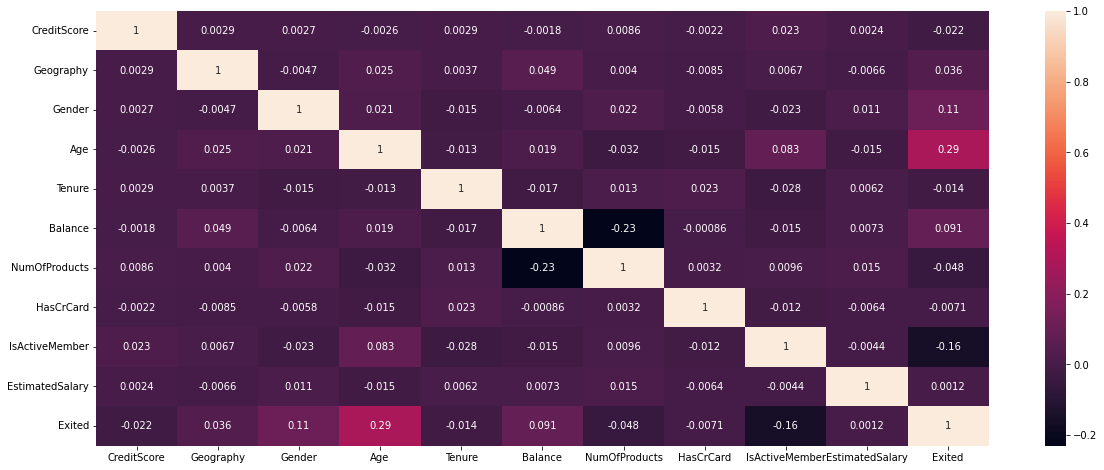

In [26]:
corr = df.corr()

plt.figure(figsize = (20,8))
sns.heatmap(corr,annot = True,cmap = 'rocket')

Comment:
We can see that age, gender and balance have the biggest impact on customers attrition.
On age plot we see that customer attrition is highest between 40 and 50. But the worst proportion is between 50 and 60 when moste customers leave. After age of 60 attrition is dropping. We can also see the older customers with larger number of products are more likely to leave.

# Preparing model

In [27]:
X = df.loc[:,['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.333333,0.0,1.0,0.50,0.2,0.0,0.000000,1.0,1.0,0.666667
1,0.333333,1.0,1.0,0.50,0.1,0.0,0.000000,0.0,1.0,0.666667
2,0.000000,0.0,1.0,0.50,0.8,0.0,0.666667,1.0,0.0,0.666667
3,0.666667,0.0,1.0,0.25,0.1,0.0,0.333333,0.0,0.0,0.666667
4,1.000000,1.0,1.0,0.50,0.2,1.0,0.000000,1.0,1.0,0.000000


In [28]:
y = df.iloc[:,-1]
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Exited, dtype: float64

In [29]:
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(sampling_strategy='minority', random_state=42)

X_res, y_res = rus.fit_resample(X, y)

X_res.shape,y_res.shape

((15926, 10), (15926,))

In [30]:
x_train,x_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.25,random_state =42)

In [31]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [32]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████| 29/29 [00:40<00:00,  1.39s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.92,0.92,0.92,0.92,1.33
RandomForestClassifier,0.92,0.92,0.92,0.92,1.29
BaggingClassifier,0.91,0.91,0.91,0.91,0.25
LabelPropagation,0.89,0.89,0.89,0.89,5.14
LabelSpreading,0.89,0.89,0.89,0.89,7.55
DecisionTreeClassifier,0.89,0.89,0.89,0.89,0.09
ExtraTreeClassifier,0.89,0.89,0.89,0.89,0.04
XGBClassifier,0.84,0.84,0.84,0.84,0.96
LGBMClassifier,0.81,0.81,0.81,0.81,0.24


In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', max_depth = 30,
                               max_features = x_train.shape[1])
model.fit(x_train, y_train)



y_predicted = model.predict(x_test)
score = model.score(x_test,y_test)
print(score)

0.9023103967855349


In [34]:
from sklearn.metrics import confusion_matrix
model_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
model_matrix

array([[1710,  326],
       [  63, 1883]])

In [35]:
from sklearn.metrics import mean_squared_error
y_pred_train = model.predict(x_train)
mean_squared_error(y_train, y_pred_train)

0.009963161419959812

In [36]:
y_pred = model.predict(x_test)
mean_squared_error(y_test, y_pred)

0.0976896032144651

All comments and feedback will welcome!